# WINE dataset


In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from ucimlrepo import fetch_ucirepo

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances 178 - Features 13 - Class 3
   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wine

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


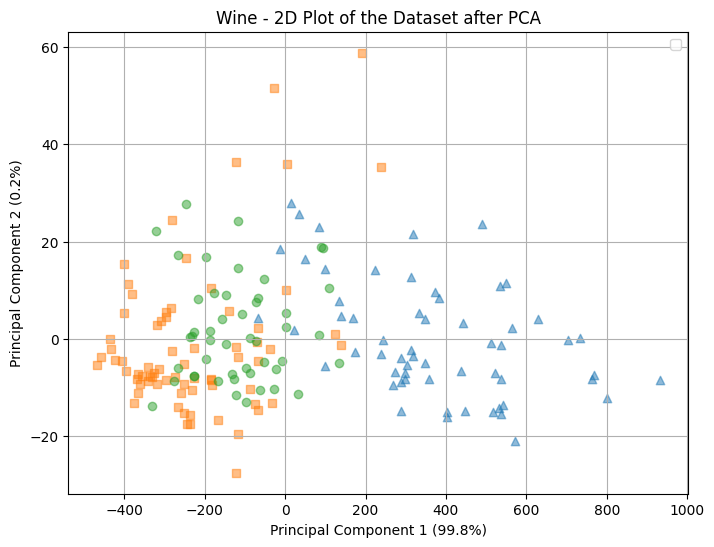

In [2]:

# fetch dataset
iris = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = pd.DataFrame(iris.data.features)
y = pd.DataFrame(iris.data.targets)
c = 3

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, ds_name="Wine", matrix_plot=False, markers=markers)

# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [7]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsi=1e-5)
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [17.98209990134212, 17.982102529647044, 17.98210255068378, 17.982102845457394, 17.98210293093789, 17.98210303587881, 17.982103205753436, 17.98210362628148, 17.98210390860022, 17.98210417952539]
ARI values: [0.8203011716576761, 0.8203011716576761, 0.8203011716576761, 0.8203011716576761, 0.8203011716576761, 0.8203011716576761, 0.8203011716576761, 0.8203011716576761, 0.8203011716576761, 0.8203011716576761]
NS values: [1.3892706418627767, 1.4093297075523983, 1.3844771800231879, 1.3685978589993137, 1.4093383278279825, 1.4161400425493795, 1.416140602522769, 1.4093589330000171, 1.3801490137723036, 1.3801634552958746]
NMI values: [0.8103790659914617, 0.8103790659914615, 0.8103790659914616, 0.8103790659914615, 0.8103790659914615, 0.8103790659914616, 0.8103790659914616, 0.8103790659914615, 0.8103790659914615, 0.8103790659914615]


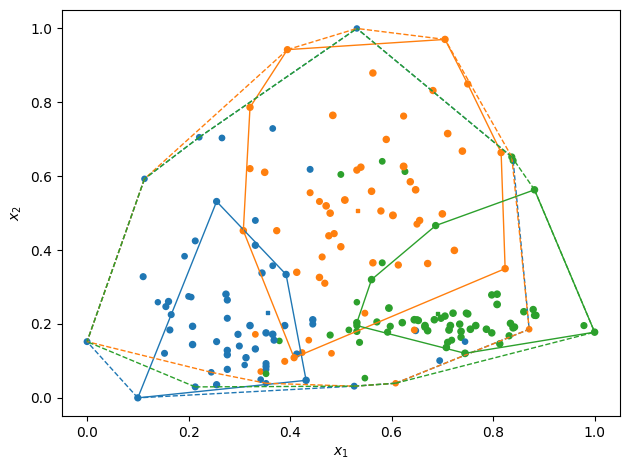

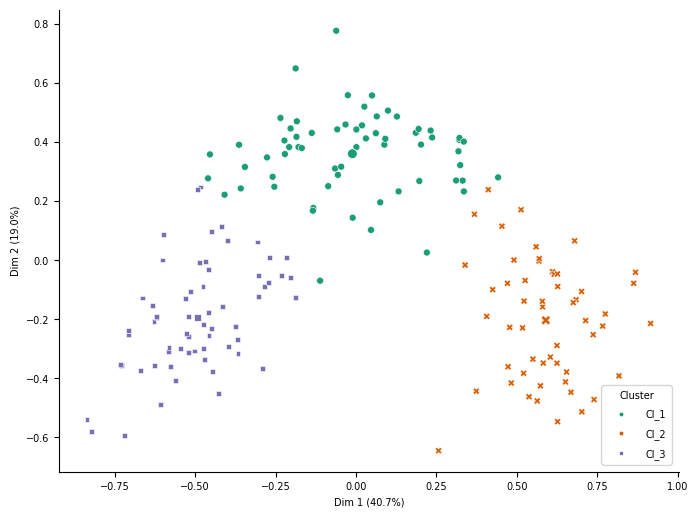

In [8]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [9]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", epsilon=1e-5)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.0747925340012838, 0.07479452701671103, 0.07640174490238613, 0.07640633768076593, 0.07715258577438583, 0.08034302370907906, 0.08132882488183887, 0.08135266033041438, 0.08135566045908815, 0.09256696710658607]
ARI values: [0.3572897205505348, 0.3572897205505348, 0.352086446685399, 0.363472908234881, 0.365079329298723, 0.5414901621704802, 0.294610995758789, 0.3001947722757845, 0.3001947722757845, 0.7545396315032984]
NS values: [1.252053931471993, 1.1502213043923784, 1.370126915823985, 1.3128196314274403, 1.273168948718889, 1.2255093668571628, 1.334584302129228, 1.3617392033743996, 1.3428262750449094, 1.0675070964762077]
NMI values: [0.4127135819926788, 0.4127135819926788, 0.39242613933363196, 0.4165769017845444, 0.41848628315297265, 0.5342884690622365, 0.3646701582037292, 0.36892321861343363, 0.3689232186134337, 0.7518075472158535]


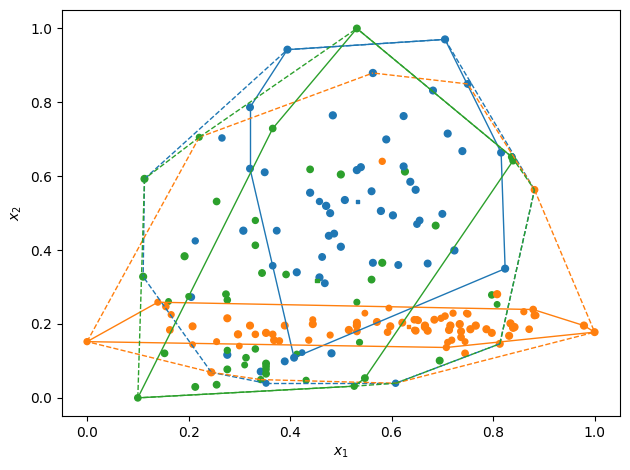

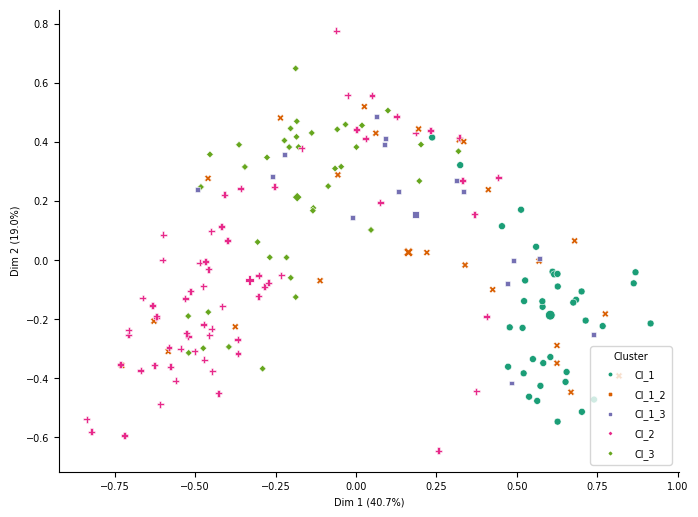

In [10]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [11]:
%%capture
keller_models = np.array([])
w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6, init="None")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [0.13346803089840875, 0.13346804941414303, 0.13346811181799062, 0.13346811748268592, 0.13346813071852642, 0.13346820473934654, 0.1334682447438703, 0.13346826239757703, 0.13346838371436637, 0.13346841494454567]
ARI values: [0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775, 0.3642327960412775]
NMI values: [0.41771358951741894, 0.4177135895174189, 0.4177135895174189, 0.41771358951741894, 0.41771358951741894, 0.4177135895174189, 0.41771358951741894, 0.4177135895174189, 0.4177135895174189, 0.4177135895174189]


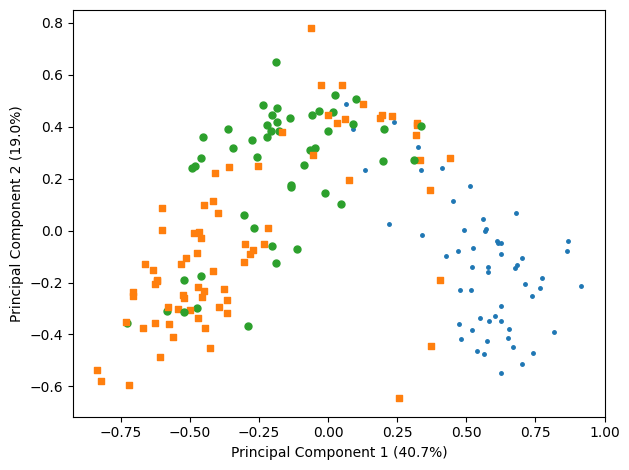

In [12]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [21]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=5, verbose=True, init="None", epsilon=1e-5)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

J values: [5.550154169783239, 5.550154901998907]
ARI values: [0.8041332311110236, 0.8041332311110236]
NMI values: [0.7800353227165624, 0.7800353227165624]


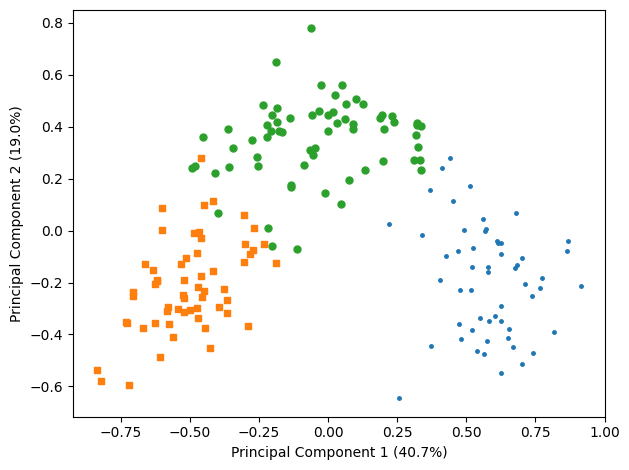

In [22]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [13]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, init="None", epsilon=1e-5)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [6.360698807832142, 6.360698853627447, 6.360699520243697, 6.360700273254416, 6.360701035902212, 6.360701225325684, 6.3607018903581745, 6.36070218428719, 6.360704660109798, 6.36070540000872]
ARI values: [0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507, 0.804078926225507]
NMI values: [0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833124, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122, 0.7968785260833122]


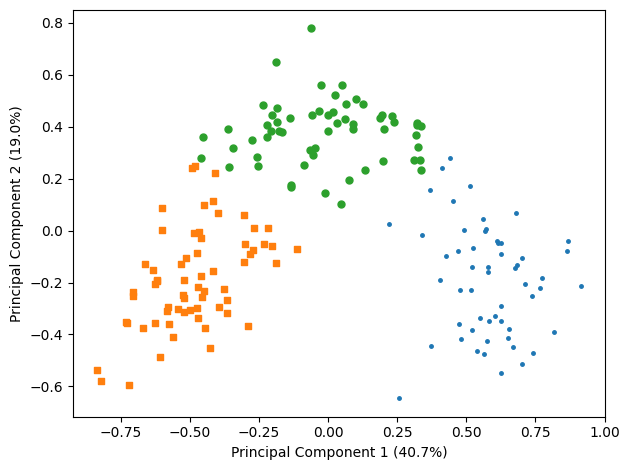

In [14]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [15]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None", epsilon=1e-5)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [0.14771769430003528, 0.14771826231233537, 0.1477190482071117, 0.14771944585313496, 0.14772110157140628, 0.14772239910695972, 0.14772420294648886, 0.14772431082248969, 0.14772509213963486, 0.14772524448043878]
ARI values: [0.7432399207674293, 0.7432399207674293, 0.7432399207674293, 0.7432399207674293, 0.7432399207674293, 0.7432399207674293, 0.7432399207674293, 0.7432399207674293, 0.7432399207674293, 0.7432399207674293]
NMI values: [0.7296900811336551, 0.7296900811336551, 0.7296900811336551, 0.7296900811336551, 0.7296900811336551, 0.7296900811336551, 0.7296900811336551, 0.7296900811336551, 0.7296900811336551, 0.7296900811336551]


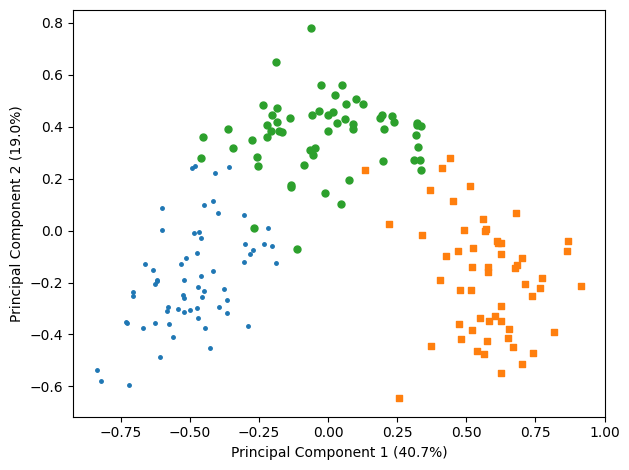

In [16]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [17]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None", epsilon=1e-5)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [0.16349937462793182, 0.16349959933366595, 0.16349972992750195, 0.1635008931363238, 0.16350091825763624, 0.16350210925248881, 0.16350293655694306, 0.16350421567555962, 0.1635042666789563, 0.16350433738099052]
ARI values: [0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567]
NMI values: [0.8069256276777939, 0.8069256276777939, 0.8069256276777939, 0.8069256276777939, 0.8069256276777939, 0.8069256276777937, 0.8069256276777939, 0.8069256276777939, 0.8069256276777939, 0.8069256276777939]


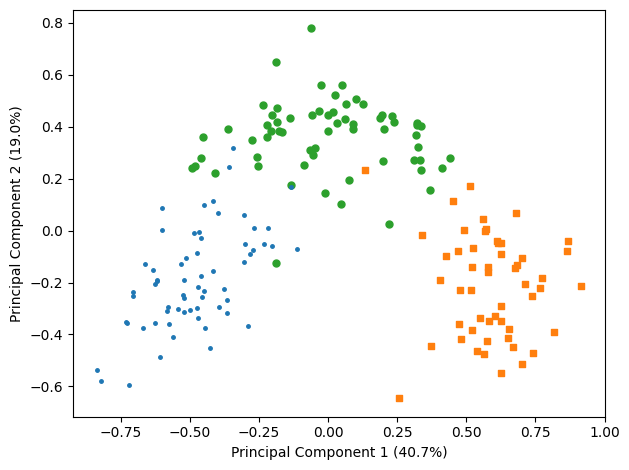

In [18]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [19]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [3.409209125051898, 3.4092091692416413, 3.4092091817846235, 3.409209267993902, 3.40920931112054, 3.40920931211257, 3.409209404585048, 3.409209415633936, 3.4092094330858975, 3.4092095520666126]
ARI values: [0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567, 0.8318970845029567]
NMI values: [0.8069256276777939, 0.806925627677794, 0.806925627677794, 0.8069256276777937, 0.806925627677794, 0.806925627677794, 0.8069256276777937, 0.806925627677794, 0.806925627677794, 0.8069256276777937]


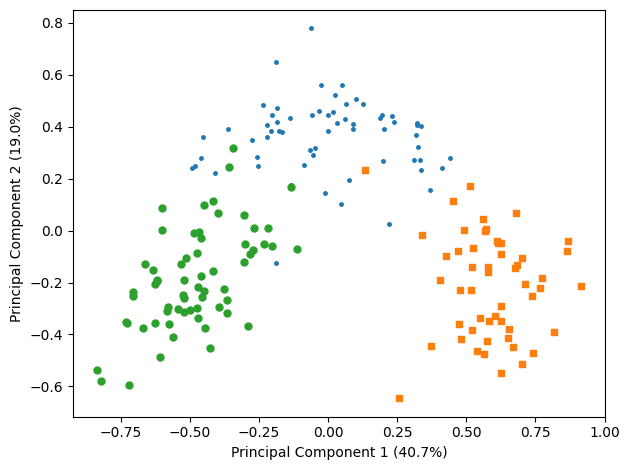

In [20]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)